In [42]:
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn import model_selection

In [22]:
datasource="dataset-energy-efficiency.csv"

In [23]:
df = pd.read_csv(datasource)

In [24]:
# Lets have quick view at samples
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
RC     768 non-null float64
SA     768 non-null float64
WA     768 non-null float64
RA     768 non-null float64
OH     768 non-null float64
OR     768 non-null int64
GA     768 non-null float64
GAD    768 non-null int64
HL     768 non-null float64
CL     768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


No null values, all features have defined datatype

In [25]:
#split dataset for heading and cooling model
df_heat = df.drop('CL',axis=1)
df_cool = df.drop('HL',axis=1)

## Lets study Heating Loads

In [26]:
df_heat.head()

,RC,SA,WA,RA,OH,OR,GA,GAD,HL
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


## Lets do Exploratory Data Analysis

In [44]:
df_heat.RC.describe()

count    768.000000
mean       0.764167
std        0.105777
min        0.620000
25%        0.682500
50%        0.750000
75%        0.830000
max        0.980000
Name: RC, dtype: float64

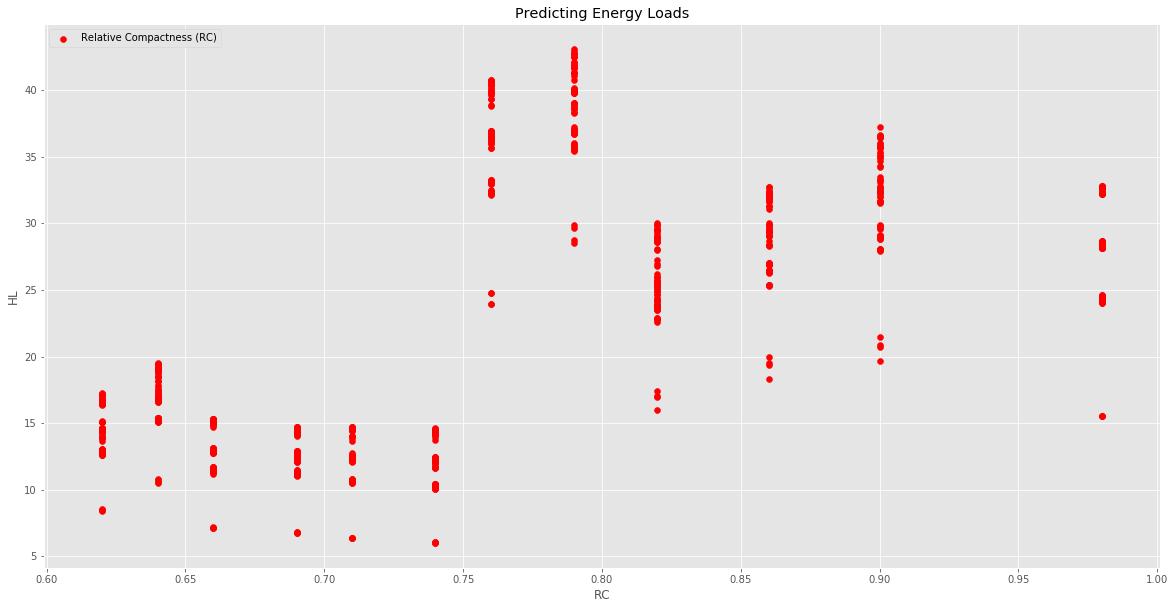

In [45]:
#Relative Compactness (RC)
fig, ax = plt.subplots(figsize=(20, 10))

X= df_heat.RC
y= df_heat.HL
ax.scatter(X,y, label='Relative Compactness (RC)', color='r')    

plt.legend(loc='upper left')
plt.title("Predicting Energy Loads")
plt.xlabel("RC")
plt.ylabel("HL")
#plt.ylim(70, 85)
plt.show()

Findings:

    - building with relative compactness (RC) between 0.75 and 0.90 has highest heating load. 
    - RC values between 0.75 and 0.80 has highest heating loads.
    - RC and HL have no direct relationship

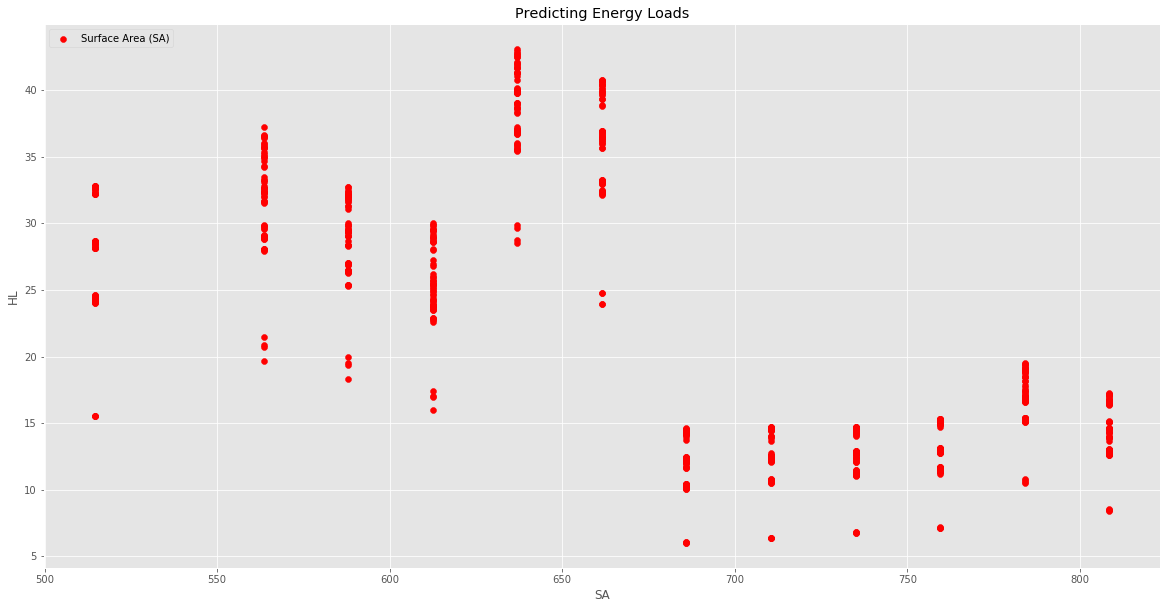

In [47]:
# Surface Area (SA)

fig, ax = plt.subplots(figsize=(20, 10))

X= df_heat.SA
y= df_heat.HL
ax.scatter(X,y, label='Surface Area (SA)', color='r')    

plt.legend(loc='upper left')
plt.title("Predicting Energy Loads")
plt.xlabel("SA")
plt.ylabel("HL")
plt.show()

Findings:
    - Heating Load is drastically decreasing above SA value 660

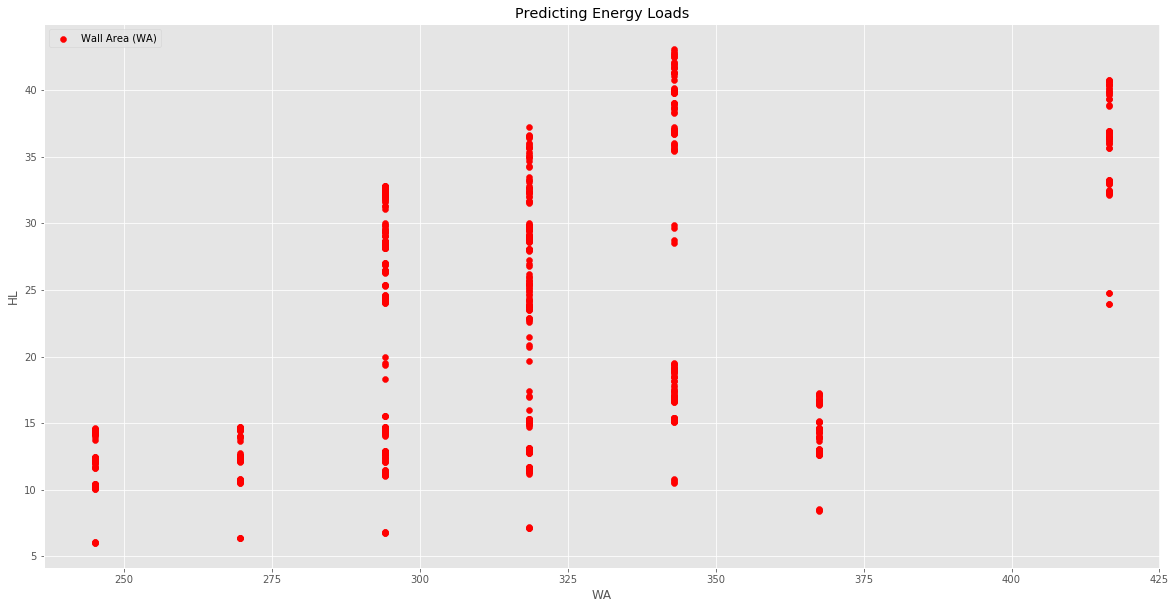

In [54]:
# Wall Area (SA)

fig, ax = plt.subplots(figsize=(20, 10))

X= df_heat.WA
y= df_heat.HL
ax.scatter(X,y, label='Wall Area (WA)', color='r')    

plt.legend(loc='upper left')
plt.title("Predicting Energy Loads")
plt.xlabel("WA")
plt.ylabel("HL")
plt.show()

Findings:
    - Heating load is gratually increasing for Wall area up to 345 and abruptly descreating and increasing again.
    

ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' kwarg instead.

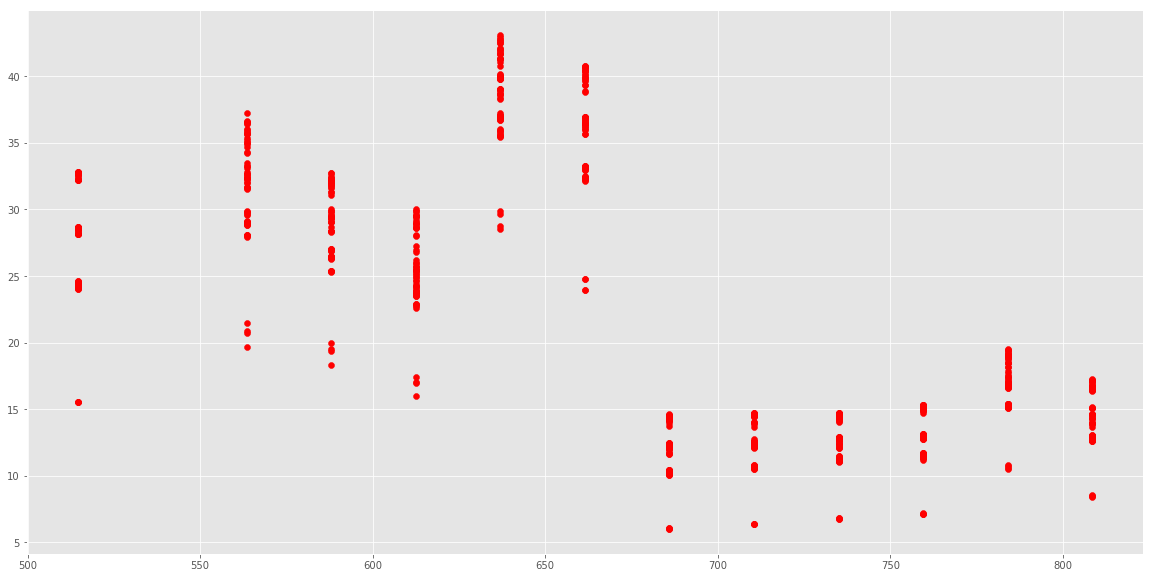

In [56]:
# Lets plot Surface Area and Wall Area (SA) together

fig, ax = plt.subplots(figsize=(20, 10))

X= df_heat.SA
y= df_heat.HL
ax.scatter(X,y, label='Surface Area (WA)', color='r')  

X= df_heat.WA
ax.scatter(X,y, label='Wall Area (WA)', color='o')  

plt.legend(loc='upper left')
plt.title("Predicting Energy Loads")
plt.xlabel("SA+WA")
plt.ylabel("HL")
plt.show()